## Task 1.2.1 - kNN on House Pricing Data (KNNR)

Implement the k-Nearest Neighbor (kNN) algorithm from scratch using only NumPy. <br><br> You may use the provided sklearn functions to load datasets and evaluate your results. Apply your kNN implementation on a regression Problem - the [California Housing Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

* Show 5 data samples to get an idea of the data. **(RESULT)**
* Split the dataset into a training set (80%) and a test set (20%). Train your model on the training set and evaluate it on the test set using the mean squared error (MSE) as a metric. Try at least 3 different values for k (e.g., 1, 3, 5) and 2 different distance measures (e.g., Euclidean, Manhattan). Report on your results. **(RESULT)**

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Import data and show 5 data samples

In [42]:
# Get California Housing Data
data = fetch_california_housing()
X, y = data.data, data.target
# print(X.shape, y.shape)


df = pd.DataFrame(X, columns=data.feature_names)
df['Target'] = y

sample_df = df.sample(5, random_state=42)

sample_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000


#Plot them

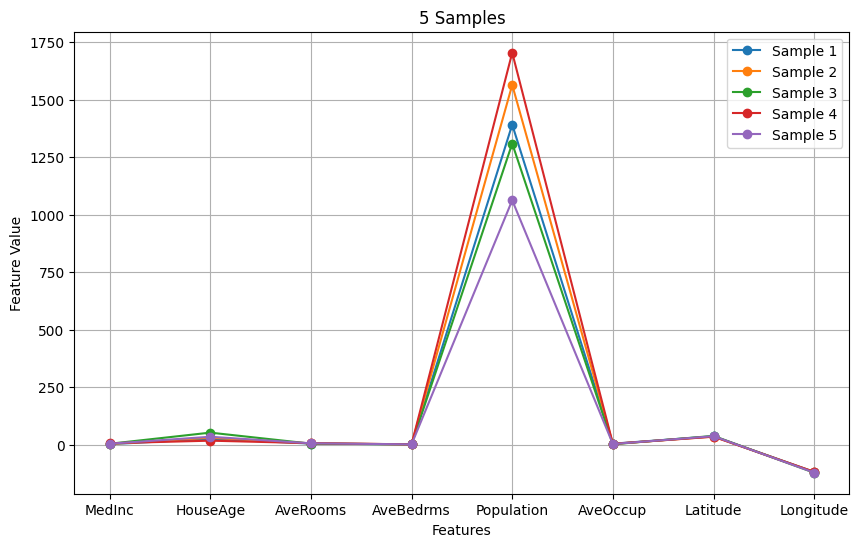

In [43]:
feature_names = data.feature_names
# Plot
plt.figure(figsize=(10,6))

for i in range(len(sample_df)):
    plt.plot(feature_names, sample_df.iloc[i, :-1], marker='o', label=f'Sample {i+1}')

plt.title('5 Samples')
plt.xlabel('Features')
plt.ylabel('Feature Value')
plt.legend()
plt.grid(True)
plt.show()

# Split the dataset

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
mean_train = X_train.mean(axis = 0)
std_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_train) / std_train
X_test_scaled = (X_test - mean_train) / std_train

# Build the KNNR

In [45]:
class KNNRegressor:
    """Your KNN Regressor implementation"""
    Euclidean="Euclidean"
    Manhattan ="Manhattan"
    def __init__(self, distance_type, k=3):
        self.k = k
        self.distance_type=distance_type

    def fit(self, X_train, y_train):
        # TODO: Implement this function
        self.x_train = X_train
        self.y_train = y_train
    def measureDist(self, X_test, X_train):
      if self.distance_type == "Euclidean":
          return np.sqrt(((X_train[:, :, None] - X_test[:, :, None].T) ** 2).sum(1))

      elif self.distance_type == "Manhattan":
          return np.abs(X_train[:, :, None] - X_test[:, :, None].T).sum(1)


    def predict(self, X_test):
        distances = self.measureDist(X_test, self.x_train)

        distances = distances.T

        y_pred = []

        for i in range(distances.shape[0]):
            k_idx = np.argsort(distances[i])[:self.k]

            k_neighbor_values = self.y_train[k_idx]

            avg_value = np.mean(k_neighbor_values)
            y_pred.append(avg_value)

        return np.array(y_pred)

In [46]:
def mean_squared_error(y_true, y_pred):
    return sum((y_true - y_pred)**2)/len(y_true)

# **Distance Metric : Euclidean**

# At K = 1

In [47]:
KNN_reg = KNNRegressor(KNNRegressor.Euclidean, k=1)
KNN_reg.fit(X_train_scaled, y_train)
y_pred = KNN_reg.predict(X_test_scaled)
error = mean_squared_error(y_test, y_pred)
print(error)

0.669012169520179


# At K=3

In [48]:
KNN_reg = KNNRegressor(KNNRegressor.Euclidean, k=3)
KNN_reg.fit(X_train_scaled, y_train)
y_pred = KNN_reg.predict(X_test_scaled)
error = mean_squared_error(y_test, y_pred)
print(error)

0.466663435051755


# At k=5

In [49]:
KNN_reg = KNNRegressor(KNNRegressor.Euclidean, k=5)
KNN_reg.fit(X_train_scaled, y_train)
y_pred = KNN_reg.predict(X_test_scaled)
error = mean_squared_error(y_test, y_pred)
print(error)

0.4324216146043232


We can observe that as k increases from 1 to 5, error decreases.
At k = 1, the model is sensitive to noise leading to higher variance.
The model at k = 5 provides the best performance among the tested values, balancing bias and variance

#Distance Metric: Manhattan
# At k =1,3,5

In [50]:
for i in [1,3,5]:
  KNN_reg = KNNRegressor(KNNRegressor.Manhattan, k=i)
  KNN_reg.fit(X_train_scaled, y_train)
  y_pred = KNN_reg.predict(X_test_scaled)
  error = mean_squared_error(y_test, y_pred)
  print(f"At K ={i} Error = {error}")

At K =1 Error = 0.5883148259926848
At K =3 Error = 0.4162312127550653
At K =5 Error = 0.3889345658463763


Error also decreases as k increases from 1 to 5, giving also best variance-bias balance.
We can see that using Manhattan as a distance metrics lead to smaller error, which can be justified by the presence of outliers in the dataset.
As Euclidean amplifies outliers due to squaring the differences between feature values. However, Manhattan is less sensitive to outliers (absloute differences between features), treating the differences linearly.

## Task 1.2.2 - DNNR

Implement the DNNR algorithm yourself and apply it to the same regression problem from Task 1.2.1. <br><br> You may use the provided sklearn functions to load datasets and evaluate your results. Apply your kNN implementation on a regression Problem - the [California Housing Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

* Split the dataset into a training set (80%) and a test set (20%). Train your model on the training set and evaluate it on the test set using the mean squared error (MSE) as a metric. Try at least 3 different values for k (e.g., 1, 3, 5) and report the results. **(RESULT)**
* How does the predicition quality of DNNR compare to kNN? Discuss your results. **(RESULT)**

# Build the DNNR estimating slopes in inference time as described in the paper pseudocode

Pseudodcode in DNNR paper had the slope calculated in inference time as well as the steps mentioned in the lecture slides

In [51]:
class DNNRegressor:
    """DNNR - uses local gradients for Taylor approximation"""
    def __init__(self, k=5, k_gradient=10):
        self.k = k  # neighbors for prediction
        self.k_gradient = k_gradient  # neighbors for gradient estimation

    def fit(self, x, y):
        # TODO: Implement this function
        self.x_train = x
        self.y_train = y


    def calcGradient(self, k_indxXM, distances, XM, YM):


        X_A = self.x_train[k_indxXM]
        y_A = self.y_train[k_indxXM]


        distances[distances == 0] = 1e-8
        distances= distances.reshape(self.k_gradient,1) #[1,2,3]

        delta_X_raw = (X_A - XM)
        delta_y_raw = (y_A - YM)
        delta_y_raw = delta_y_raw.reshape(self.k_gradient,1)
        delta_X = delta_X_raw / distances  # (X_i - X_m) / h_i
        delta_y = delta_y_raw / distances


        try:
            gamma_m = np.linalg.pinv(delta_X.T @ delta_X) @ delta_X.T @ delta_y
        except np.linalg.LinAlgError:

            gamma_m = np.zeros(self.x_train.shape[1])
        return gamma_m


    def TaylorExpansion(self, gamma_m, X_test, X_m, y_m):
      return y_m + gamma_m.T @ (X_test- X_m)


    def predict(self, X_test):
        # TODO: Implement this function

        Taylor_Expansion=[]
        k_indxfin, distances=self.FindIndcesOfKNN(X_test, self.x_train, self.k) #2d list each index is 1d list of knn indices of the ith test point
        i=0
        for testpoint in k_indxfin:
          x_train_knn = self.x_train[testpoint]
          y_train_knn = self.y_train[testpoint]
          j=0
          y_pred=[]
          for XM in x_train_knn:

            k_indxXM, distances1=(self.FindIndcesOfKNN(np.array([XM]), self.x_train, self.k_gradient+1))
            k_indxXM=k_indxXM[0, 1:]
            distances1=distances1[0, 1:]
            gradient=self.calcGradient(k_indxXM, distances1, XM, y_train_knn[j])
            y_pred.append(self.TaylorExpansion(gradient, X_test[i], XM, y_train_knn[j]))
            j+=1
          Taylor_Expansion.append(np.mean(np.array(y_pred)))
          i+=1

        return np.array(Taylor_Expansion)



    def measureDist(self, X_test, X_train):

          return np.sqrt(((X_train[:, :, None] - X_test[:, :, None].T) ** 2).sum(1))




    def FindIndcesOfKNN(self, X_test, x_train, k):
        distances = self.measureDist(X_test, x_train)  # shape (n_train, n_test) [[d1,d2,d3,....dx], [d1,d2,,....dx],....]

        distances = distances.T

        K_indxfin = []
        DistancesArrFin=[]

        for i in range(distances.shape[0]):
            k_idx = np.argsort(distances[i])[:k]
            distancesArr=np.sort(distances[i])[:k]


            K_indxfin.append(k_idx)
            DistancesArrFin.append(distancesArr)



        return np.array(K_indxfin), np.array(DistancesArrFin) #2d list each index is 1d list of knn indices of the ith test point


According to the paper, the DNNR hyperparameters should be chosen based on the size of the dataset. Since our dataset is considered somewhat medium-sized, the k_gradient should range between 2xd (2x8) and 18xd (18x8). So we based our tests on this range.

# Test with k=1 and K_gradient=16

In [52]:
dnnr = DNNRegressor(1,16)
dnnr.fit(X_train_scaled, y_train)
y_pred = dnnr.predict(X_test_scaled)
error = mean_squared_error(y_test, y_pred)
print(error)

0.7894509831359207


# Test with k=3 and K_gradient=48

In [53]:
dnnr = DNNRegressor(3,48)
dnnr.fit(X_train_scaled, y_train)
y_pred = dnnr.predict(X_test_scaled)
error = mean_squared_error(y_test, y_pred)
print(error)

0.40067487851058464


# Test with k=5 and K_gradient=80

In [54]:
dnnr = DNNRegressor(5,80)
dnnr.fit(X_train_scaled, y_train)
y_pred = dnnr.predict(X_test_scaled)
error = mean_squared_error(y_test, y_pred)
print(error)

0.36242684989554824


# Implemented DNNR with pre-computed slopes as in Tutorial

In [55]:
class DNNRegressor:
    """DNNR - uses local gradients for Taylor approximation"""
    def __init__(self, k=5, k_gradient=10):
        self.k = k  # neighbors for prediction
        self.k_gradient = k_gradient  # neighbors for gradient estimation


    def fit(self, x, y):
        # TODO: Implement this function
        self.x_train = x
        self.y_train = y
        self.gradient= self.precomputeslopes()


    def calcGradient(self, k_indxXM, distances, XM, YM):


        X_A = self.x_train[k_indxXM]
        y_A = self.y_train[k_indxXM]


        distances[distances == 0] = 1e-8
        distances= distances.reshape(self.k_gradient,1) #[1,2,3]

        delta_X_raw = (X_A - XM)
        delta_y_raw = (y_A - YM)
        delta_y_raw = delta_y_raw.reshape(self.k_gradient,1)
        delta_X = delta_X_raw / distances  # (X_i - X_m) / h_i
        delta_y = delta_y_raw / distances


        try:
            gamma_m = np.linalg.pinv(delta_X.T @ delta_X) @ delta_X.T @ delta_y
        except np.linalg.LinAlgError:

            gamma_m = np.zeros(self.x_train.shape[1])
        return gamma_m


    def TaylorExpansion(self, gamma_m, X_test, X_m, y_m):
      return y_m + gamma_m.T @ (X_test- X_m)


    def predict(self, X_test):
        # TODO: Implement this function

        Taylor_Expansion=[]
        k_indxfin, distances=self.FindIndcesOfKNN(X_test, self.x_train, self.k) #2d list each index is 1d list of knn indices of the ith test point
        i=0
        for testpoint in k_indxfin:

          y_pred=[]
          for k in testpoint:
            y_pred.append(self.TaylorExpansion(self.gradient[k], X_test[i], self.x_train[k], self.y_train[k]))
          Taylor_Expansion.append(np.mean(np.array(y_pred)))
          i+=1

        return np.array(Taylor_Expansion)



    def measureDist(self, X_test, X_train):

          return np.sqrt(((X_train[:, :, None] - X_test[:, :, None].T) ** 2).sum(1))


    def precomputeslopes(self):
      j=0
      gradient=[]
      for XM in self.x_train:
       k_indxXM, distances1=(self.FindIndcesOfKNN(np.array([XM]), self.x_train, self.k_gradient+1))
       k_indxXM=k_indxXM[0, 1:]
       distances1=distances1[0, 1:]
       gradient.append(self.calcGradient(k_indxXM, distances1, XM, self.y_train[j]))
       j+=1
      return gradient


    def FindIndcesOfKNN(self, X_test, x_train, k):
        distances = self.measureDist(X_test, x_train)  # shape (n_train, n_test) [[d1,d2,d3,....dx], [d1,d2,,....dx],....]

        distances = distances.T

        K_indxfin = []
        DistancesArrFin=[]

        for i in range(distances.shape[0]):
            k_idx = np.argsort(distances[i])[:k]
            distancesArr=np.sort(distances[i])[:k]


            K_indxfin.append(k_idx)
            DistancesArrFin.append(distancesArr)



        return np.array(K_indxfin), np.array(DistancesArrFin) #2d list each index is 1d list of knn indices of the ith test point


# Test with K=1 and k_gradient=16

In [56]:
dnnr = DNNRegressor(1,16)
dnnr.fit(X_train_scaled, y_train)
y_pred = dnnr.predict(X_test_scaled)
error = mean_squared_error(y_test, y_pred)
print(error)

0.7894509831359207


# Test with k=3 and k_gradient=48

In [57]:
dnnr = DNNRegressor(3,48)
dnnr.fit(X_train_scaled, y_train)
y_pred = dnnr.predict(X_test_scaled)
error = mean_squared_error(y_test, y_pred)
print(error)

0.40067487851058464


#Test with k=5 and k_gradient=80

In [58]:
dnnr = DNNRegressor(5,80)
dnnr.fit(X_train_scaled, y_train)
y_pred = dnnr.predict(X_test_scaled)
error = mean_squared_error(y_test, y_pred)
print(error)

0.36242684989554824


# Comparison between the two approaches of building the DNNR

The 2 approaches for building DNNR are equivalent when it comes to the mean sqaured error but for the computation time it differs. Generally, computation time is better in the first approach, but our intuition is that as k_gradient increases, the first approach won't be better as we are approaching the time taken to precompute slopes for the whole training data set anyways.

# Results

As you can see, as the k_gradient gets higher, the better the gradient approximation is as we make more sense of the actual trend of neighbouring data points. Thus, as the gradient approximation gets better, the better the prediction and the less the mean squared error becomes.

# Comparison

This comparison will be made between DNNR and KNNR using Euclidean distance as the distance metric. DNNR shows better results at k=3 and k=5 compared to KNNR. While at k=1, the KNNR showed better results. This can be explained by the fact that as per the paper, the best values for the hyperparameter k in medium sized datasets starts with 3. This can be because of the DNNR approximates the gradient, so there must be some error in the approximation. So, with k=1, the averaging of the gradient estimation error is lost. While in KNNR, a single data point is taken into consideration with no further error (gradient approximation error) introduced and thus the loss of error averaging might not be very influencial.

As this dataset consist of features that causes a trend in the target (ex: as number of rooms increase, house price increase), it is a good practise to take into consideration the gradient or the trend of the neighbouring points when making the prediction. That's why at K=3,5, DNNR performed better because:
1. It takes into consideration the best values for k.
2. It accounts from the trend in data points.

## Congratz, you made it! :)